In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

# Normalizing Dataset

In [5]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


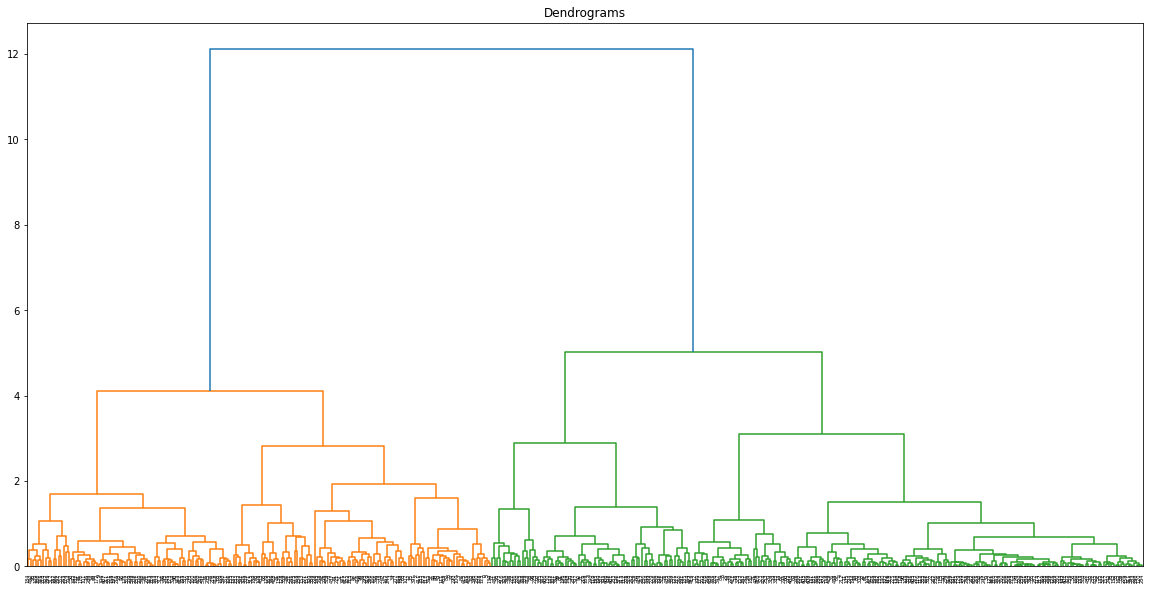

In [6]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

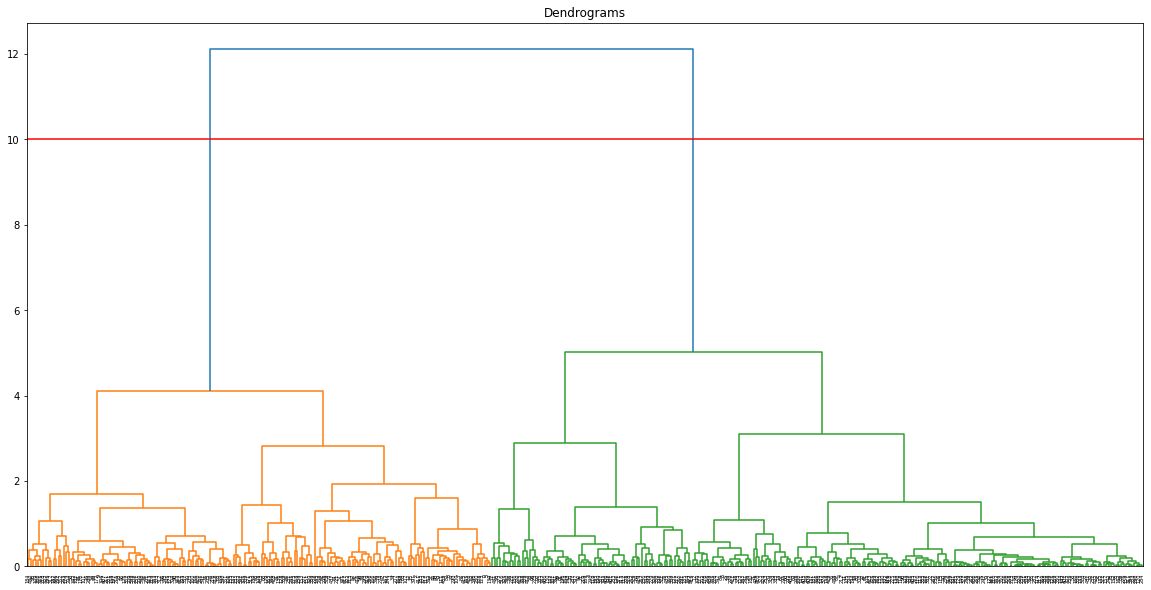

In [7]:
plt.figure(figsize=(20,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='-') # 10 is a thresold

In [8]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

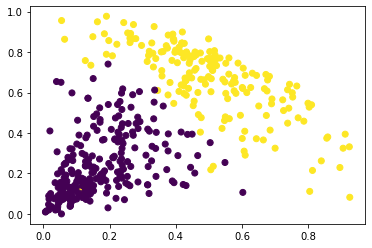

In [9]:
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 
plt.show()

In [10]:
def thresoldAggClustering(k) :
    cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',distance_threshold=k)  
    print(f'No of Clusters : {len(set(cluster.fit_predict(data_scaled)))}')

In [11]:
thresoldAggClustering(3.0) # Manual Thresold

No of Clusters : 5
